In [1]:
import numpy as np 
import matplotlib.pyplot  as plt

решение уравнения Лапласа 
$
\\
\Delta U = 0
$

$
U(-1,y) = 1-y^2 , \space U(1,y)=1-y^2 , \space \space \space U(x,-1) = x^2-1 , \space U(x,1)= x^2-1 , \space (x,y) \in [-1,1]\times[-1,1]
$

точное решение 
$
U(x,y) = x^2 - y^2
$

$
\Delta =  \frac{d^2 U}{dx^2} + \frac{d^2 U}{dy^2} = 0 \\ 
= \frac{U_{i+1,j} -2U_{i,j}+U_{i-1,j} }{{\Delta x}^2} +  \frac{U_{i,j+1} -2U_{i,j}+U_{i,j-1} }{{\Delta y}^2} =0 \\
U_{i,j} = \frac{U_{i+1,j}+U_{i-1,j}+U_{i,j+1}+U_{i,j-1}}{4}, \space \space \space \space \Delta x =\Delta y
$

По метод Якобы
$
U_{i,j}^{n+1} = \frac{U_{i+1,j}^n+U_{i-1,j}^n+U_{i,j+1}^n+U_{i,j-1}^n}{4}
$

По метод Зайдел
$
U_{i,j}^{n+1} = \frac{U_{i+1,j}^n+U_{i-1,j}^{n+1}+U_{i,j+1}^n+U_{i,j-1}^{n+1}}{4}
$

По метод верхнего релаксация 
$
U_{i,j}^{n+1} =(1-\lambda)U_{i,j}^{n} + \lambda \frac{U_{i+1,j}^n+U_{i-1,j}^n+U_{i,j+1}^n+U_{i,j-1}^n}{4} \\
1<\lambda <2
$

In [2]:
f = lambda x,y :x**2 - y**2

In [187]:
def Zeydeli_Iteration_To_Laplace_Equation(n):
    x = np.linspace(-1,1,n)
    y = np.linspace(-1,1,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    Z[1:-1,1:-1]=0
    Itr = 0
    Z2 = np.copy(Z)
    e = 1
    while e>1e-3:
        Z2 = np.copy(Z)
        for i in range(1,n-1):
            for j in range(1,n-1):
                Z[i,j]= (1/4)*(Z[i,j-1] +Z[i,j+1]+Z[i-1,j]+Z[i+1,j])
            Itr+=1
        e = np.linalg.norm(np.ravel(Z2-Z))
    return X,Y,Z,Itr

In [160]:
def Yakob_Iteration_To_Laplace_Equation(n):
    x = np.linspace(-1,1,n)
    y = np.linspace(-1,1,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    Z[1:-1,1:-1]=0
    Z2 = np.copy(Z)
    Itr=0
    e =1
    while e>1e-3:
        for i in range(1,n-1):
            for j in range(1,n-1):
                Z[i,j]= (1/4)*(Z2[i,j-1] +Z2[i,j+1]+Z2[i-1,j]+Z2[i+1,j])
            Itr+=1
        e = np.linalg.norm(np.ravel(Z2-Z))
        Z2 = np.copy(Z)
    return X,Y,Z,Itr

In [161]:
R = Yakob_Iteration_To_Laplace_Equation(12)
R[3]

310

In [168]:
R = Zeydeli_Iteration_To_Laplace_Equation(12)
R[3]

290

In [169]:
R = SOR_Iteration_To_Laplace_Equation(12,1.02)
R[3]

30

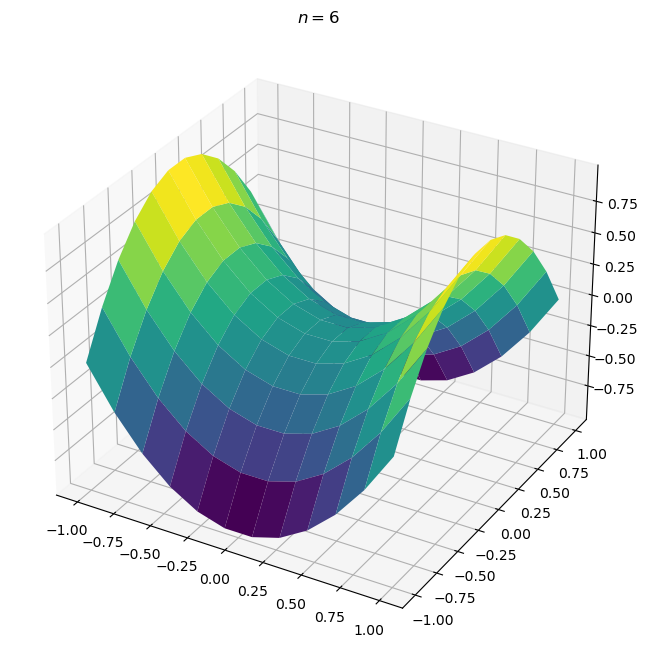

In [167]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$n=6$');

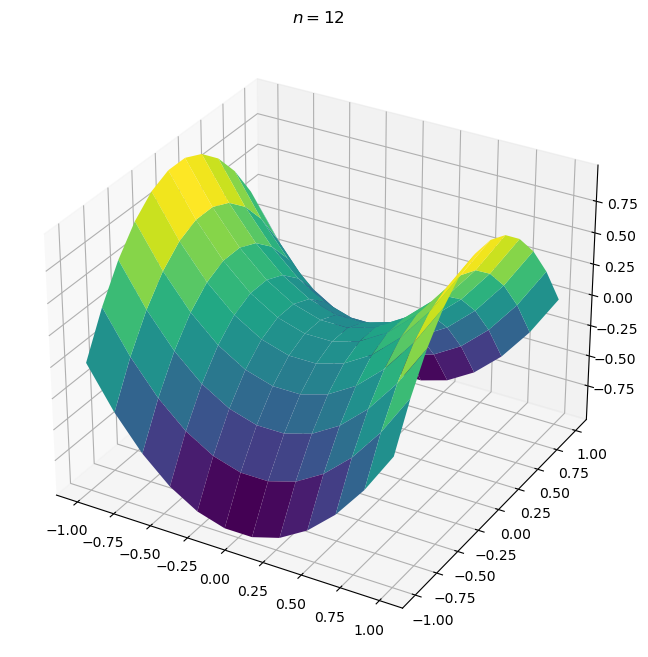

In [10]:
R = Yakob_Iteration_To_Laplace_Equation(12)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$n=12$');

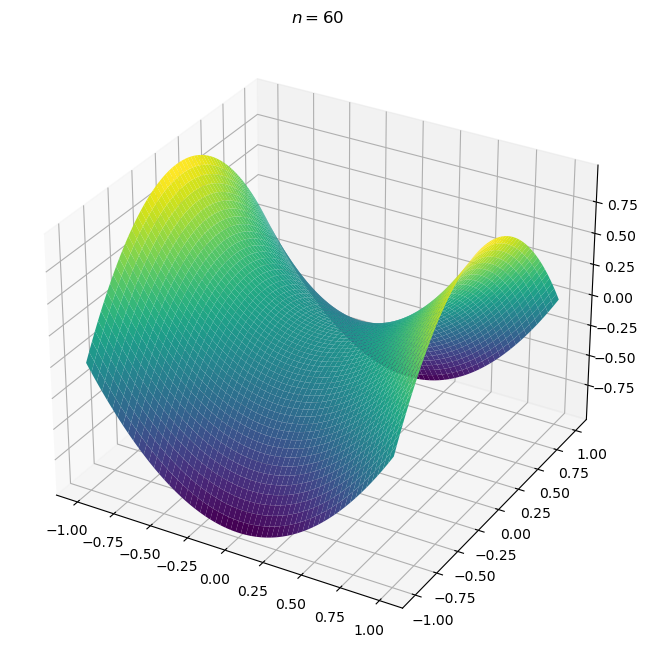

In [11]:
R = Yakob_Iteration_To_Laplace_Equation(60)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$n=60$');

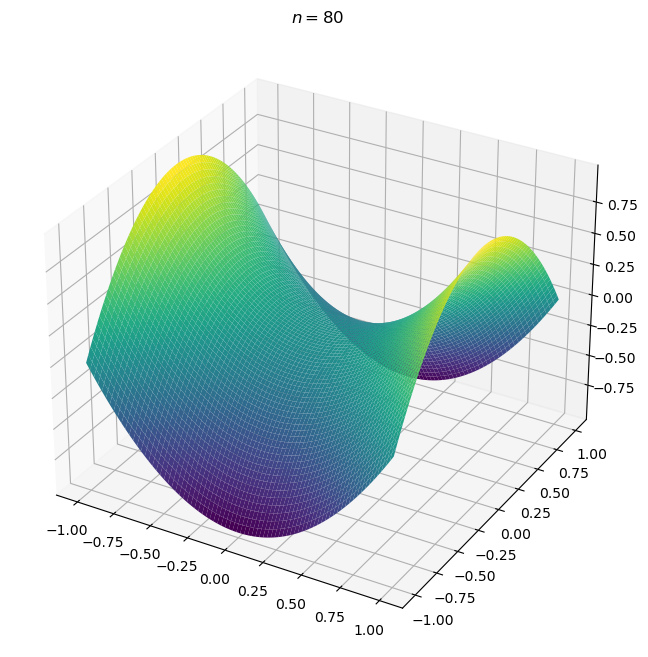

In [5]:
R = Yakob_Iteration_To_Laplace_Equation(80)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$n=80$');

In [91]:
def Error_zeydeli(N):
    n= len(N)
    E = np.zeros(n)
    for i in range(n):
        R=Zeydeli_Iteration_To_Laplace_Equation(N[i])
        W=f(R[0],R[1])
        e=np.linalg.norm(np.ravel(W-R[2]))/(len(np.ravel(W))*np.linalg.norm(np.ravel(W)))
        E[i]=e
    return E

In [92]:
def Error_Yakob(N):
    n= len(N)
    E = np.zeros(n)
    for i in range(n):
        R=Yakob_Iteration_To_Laplace_Equation(N[i])
        W=f(R[0],R[1])
        e=np.linalg.norm(np.ravel(W-R[2]))/(len(np.ravel(W))*np.linalg.norm(np.ravel(W)))
        E[i]=e
    return E

In [244]:
def Error_SOR(N):
    n= len(N)
    E = np.zeros(n)
    for i in range(n):
        R=SOR_Iteration_To_Laplace_Equation(N[i],0.9)
        W=f(R[0],R[1])
        e=np.linalg.norm(np.ravel(W-R[2]))/(len(np.ravel(W))*np.linalg.norm(np.ravel(W)))
        E[i]=e
    return E

In [245]:
SOR_Iteration_To_Laplace_Equation(12,1.02)[3]

30

In [246]:
N =np.array([12,20,26,36,50,60,70,80])
E=Error_zeydeli(N)
E2 = Error_Yakob(N)
E3 = Error_SOR(N)

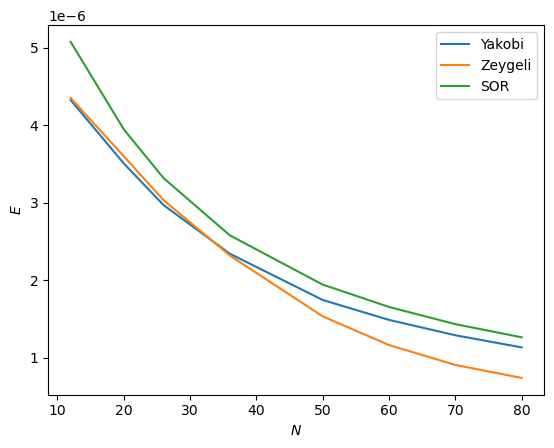

In [247]:
plt.plot(N,E2)
plt.plot(N,E)
plt.plot(N,E3)
plt.xlabel('$N $')
plt.ylabel('$E $')
plt.legend(["Yakobi","Zeygeli","SOR"])

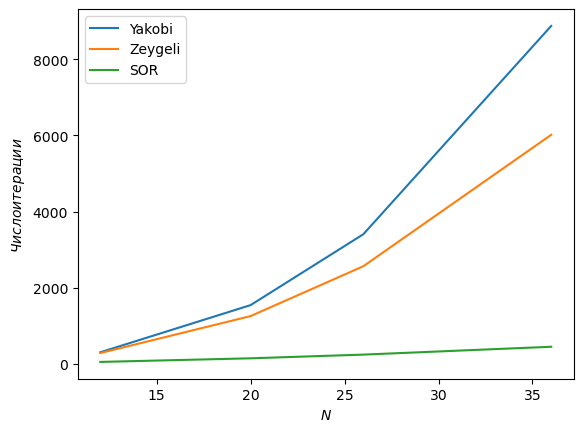

In [242]:
iter1 = np.array([])
iter2 = np.array([])
iter3 = np.array([])
for i in N:
    R1=Yakob_Iteration_To_Laplace_Equation(i)
    R2=Zeydeli_Iteration_To_Laplace_Equation(i)
    R3=SOR_Iteration_To_Laplace_Equation(i,0.5)
    iter1 = np.append(iter1,R1[3])
    iter2 = np.append(iter2,R2[3])
    iter3 = np.append(iter3,R3[3])

plt.plot(N,iter1)
plt.plot(N,iter2)
plt.plot(N,iter3)
plt.xlabel('$N $')
plt.ylabel('$Число итерации$')
plt.legend(["Yakobi","Zeygeli","SOR"])

In [195]:
import warnings
warnings.filterwarnings('ignore')

In [228]:
def SOR_Iteration_To_Laplace_Equation(n,w):
    x = np.linspace(-1,1,n)
    y = np.linspace(-1,1,n)
    X,Y = np.meshgrid(x,y)
    Z =  f(X,Y)
    Z[1:-1,1:-1]=0
    Z2 = np.copy(Z)
    Itr=0
    e =1
    while e>1e-3:
        for i in range(1,n-1):
            for j in range(1,n-1):
                Z[i,j]=(1-w)*Z2[i,j]+ (w/4)*(Z2[i,j-1] +Z2[i,j+1]+Z2[i-1,j]+Z2[i+1,j])
        Itr+=1
        e = np.linalg.norm(np.ravel(Z2-Z))
        Z2 = np.copy(Z)
    return X,Y,Z,Itr,V

In [236]:
R = SOR_Iteration_To_Laplace_Equation(60,0.9)
R[3]

727

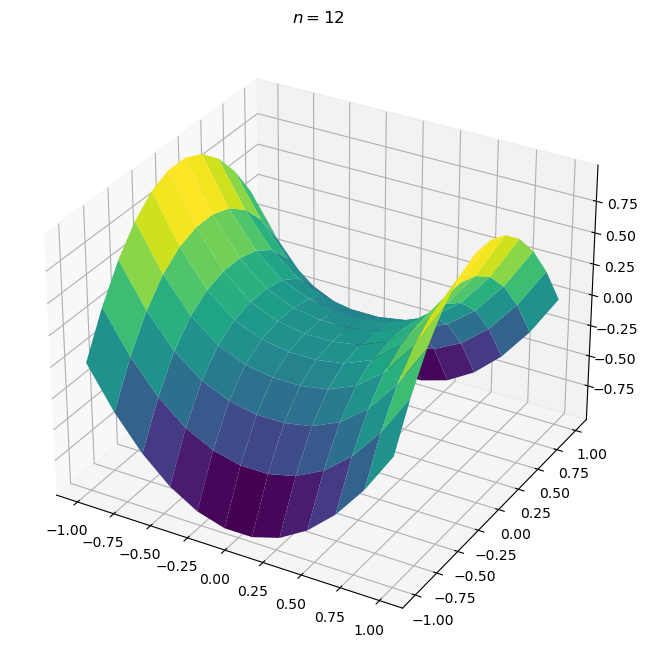

In [222]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$n=12$');

In [238]:
w = np.linspace(0.1 ,0.99,5)
n = np.array([])
for item in w:
    n = np.append(n,SOR_Iteration_To_Laplace_Equation(60,item)[3])

Text(0, 0.5, 'Число итерации')

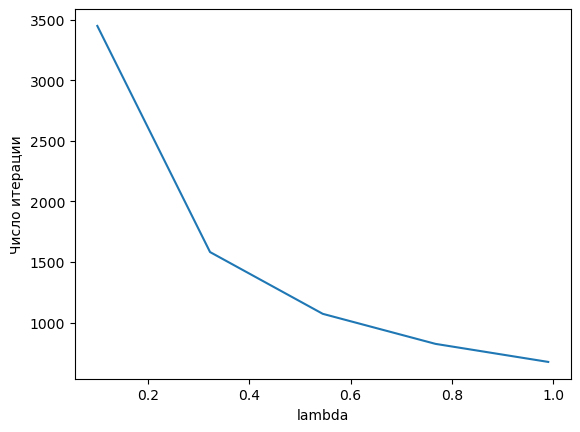

In [239]:
plt.plot(w,n)
plt.xlabel("lambda")
plt.ylabel("Число итерации")